In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [ ]:
True_df = pd.read_csv('/content/gdrive/My Drive/True.csv')
Fake_df = pd.read_csv('/content/gdrive/My Drive/Fake.csv')

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding, Dropout
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

import numpy as np
import pandas as pd
import tensorflow as tf
import os

import nltk # NLP  
from nltk.corpus import stopwords  
from nltk.stem import WordNetLemmatizer 
from nltk.stem import PorterStemmer 
import re  

# visualization 
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
%matplotlib inline

Dataset overview

In [ ]:
Fake_df.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [ ]:
True_df.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


concatenate 2 files in 1

In [ ]:
Fake_df['target'] = 0
True_df['target'] = 1

In [ ]:
# data merge
df = pd.concat([True_df, Fake_df], ignore_index=True, sort=False)
# ignore_index, sort
df.head()

,title,text,subject,date,target
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [ ]:
import random
df = df.sample(df.shape[0])
df.head()

,title,text,subject,date,target
18977,"No, m'lud: Brexit stymies EU judges' English c...",BRUSSELS (Reuters) - The European Court of Jus...,worldnews,"September 26, 2017",1
38928,IT JUST GOT REAL! GOP Rep. Jim Jordan Tells Ju...,One of the big players in trying to get to the...,left-news,"Dec 17, 2017",0
37054,UH OH! STEPHANOPOULOS JOINED CLINTON ON ‘PEDO ...,The main stream media has done a great job of ...,politics,"May 24, 2015",0
8753,Kerry's Syria plan greeted with concern over R...,WASHINGTON (Reuters) - As U.S. Secretary of St...,politicsNews,"July 13, 2016",1
32460,TOWN’S PARADE CANCELED After Violent Antifa Ra...,The irony in this entire cancellation of a tra...,politics,"Apr 26, 2017",0


In [ ]:
print(True_df.isna().sum(), Fake_df.isna().sum(), sep='\n\n')

title      0
text       0
subject    0
date       0
target     0
dtype: int64

title      0
text       0
subject    0
date       0
target     0
dtype: int64


Graph for df

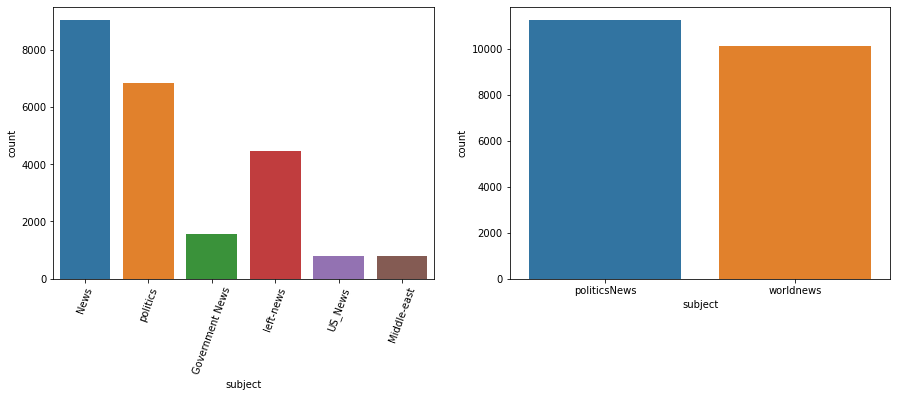

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) 

# Fake_df & True_df
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.countplot(x='subject', data=Fake_df)
plt.xticks(rotation =70)

plt.subplot(1, 2, 2)
sns.countplot(x='subject', data=True_df)
plt.show()

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

Frequent words

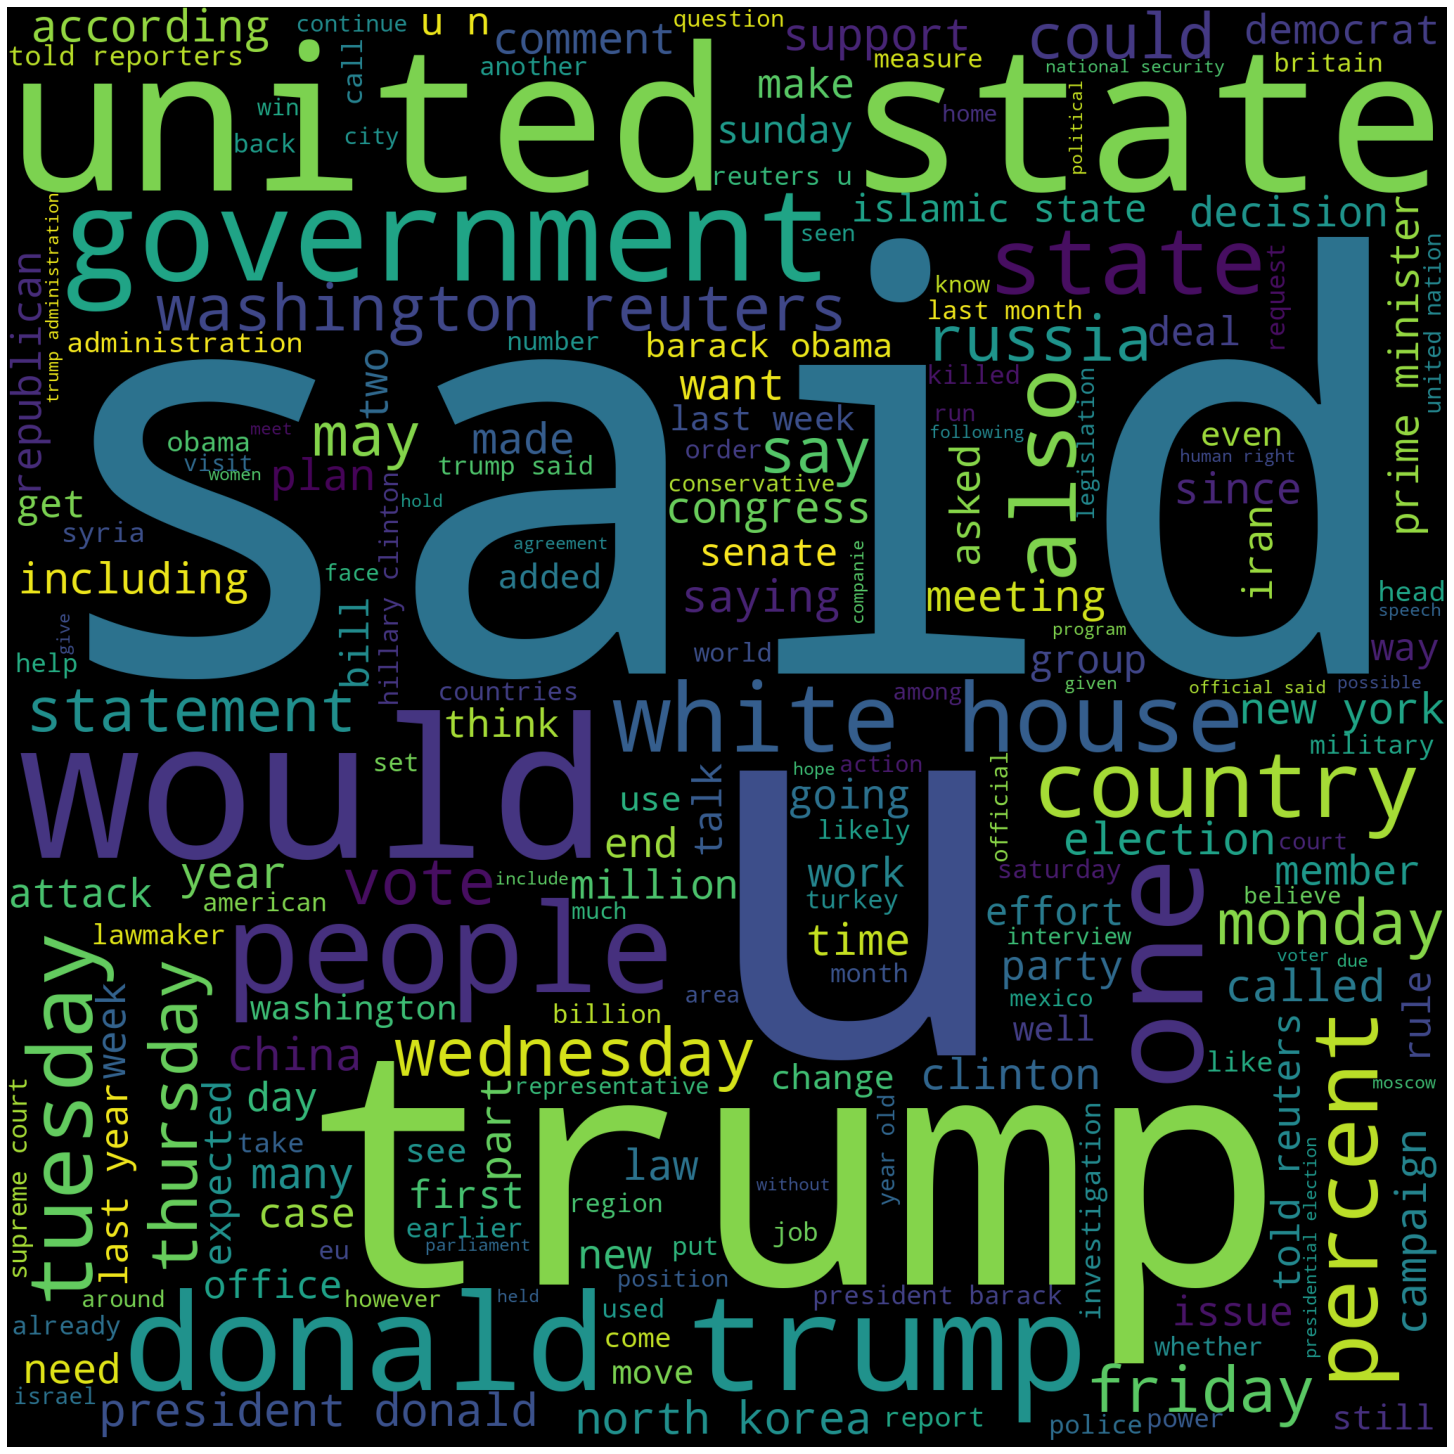

In [ ]:
# Word_Cloud
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

comment_words = '' 
stopwords = set(stop_words) 
  
# iterate through the csv file 
for val in df[df['target']==1]['text']: 
      
    # typecaste each val to string 
    val = str(val) 
  

    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 2048, height = 2048, 
                background_color ='black', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (20, 20), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

Data cleaning:

remove punctuations
remove non alphabets
convert Upper to Lower
remove stopwords
Lemmatizer: why? In morphology and lexicography, a lemma is the canonical form, dictionary form, or citation form of a set of words (headword). In English, for example, break, breaks, broke, broken and breaking are forms of the same lexeme, with break as the lemma by which they are indexed. Lemmatization stems the word but makes sure that it does not lose its meaning. Lemmatization has a pre-defined dictionary that stores the context of words and checks the word in the dictionary while diminishing.
URL removal?

In [ ]:
#leave just text and title, because only this have to be cleanned now
df['text'] = df['title'] + ' ' + df['text'] # 'politicsNews About trump he was a president'

del df['title']
del df['subject']
del df['date']

df.head()

,text,target
18977,"No, m'lud: Brexit stymies EU judges' English c...",1
38928,IT JUST GOT REAL! GOP Rep. Jim Jordan Tells Ju...,0
37054,UH OH! STEPHANOPOULOS JOINED CLINTON ON ‘PEDO ...,0
8753,Kerry's Syria plan greeted with concern over R...,1
32460,TOWN’S PARADE CANCELED After Violent Antifa Ra...,0


Visualization purpose: clean the first article only

In [ ]:
first_text = df['text'][0]
first_text

'As U.S. budget fight looms, Republicans flip their fiscal script WASHINGTON (Reuters) - The head of a conservative Republican faction in the U.S. Congress, who voted this month for a huge expansion of the national debt to pay for tax cuts, called himself a “fiscal conservative” on Sunday and urged budget restraint in 2018. In keeping with a sharp pivot under way among Republicans, U.S. Representative Mark Meadows, speaking on CBS’ “Face the Nation,” drew a hard line on federal spending, which lawmakers are bracing to do battle over in January. When they return from the holidays on Wednesday, lawmakers will begin trying to pass a federal budget in a fight likely to be linked to other issues, such as immigration policy, even as the November congressional election campaigns approach in which Republicans will seek to keep control of Congress. President Donald Trump and his Republicans want a big budget increase in military spending, while Democrats also want proportional increases for non

In [ ]:
!pip install contractions


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.2/103.2 KB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 KB 19.2 MB/s eta 0:00:00


In [ ]:
import contractions
first_text =  ' '.join([contractions.fix(word) for word in first_text.split()])
first_text

'As YOU.S. budget fight looms, Republicans flip their fiscal script WASHINGTON (Reuters) - The head of a conservative Republican faction in the YOU.S. Congress, who voted this month for a huge expansion of the national debt to pay for tax cuts, called himself a “fiscal conservative” on Sunday and urged budget restraint in 2018. In keeping with a sharp pivot under way among Republicans, YOU.S. Representative Mark Meadows, speaking on CBS’ “Face the Nation,” drew a hard line on federal spending, which lawmakers are bracing to do battle over in January. When they return from the holidays on Wednesday, lawmakers will begin trying to pass a federal budget in a fight likely to be linked to other issues, such as immigration policy, even as the November congressional election campaigns approach in which Republicans will seek to keep control of Congress. President Donald Trump and his Republicans want a big budget increase in military spending, while Democrats also want proportional increases f

In [ ]:
first_text = re.sub('\[[^]]*\]', ' ', first_text) # remove punctuations
first_text = re.sub('[^a-zA-Z]',' ',first_text)  # replaces non-alphabets with spaces
first_text = first_text.lower() # Converting from uppercase to lowercase
first_text

'as you s  budget fight looms  republicans flip their fiscal script washington  reuters    the head of a conservative republican faction in the you s  congress  who voted this month for a huge expansion of the national debt to pay for tax cuts  called himself a  fiscal conservative  on sunday and urged budget restraint in       in keeping with a sharp pivot under way among republicans  you s  representative mark meadows  speaking on cbs   face the nation   drew a hard line on federal spending  which lawmakers are bracing to do battle over in january  when they return from the holidays on wednesday  lawmakers will begin trying to pass a federal budget in a fight likely to be linked to other issues  such as immigration policy  even as the november congressional election campaigns approach in which republicans will seek to keep control of congress  president donald trump and his republicans want a big budget increase in military spending  while democrats also want proportional increases f

In [ ]:
# is, not, an: stopwords
from nltk.corpus import stopwords
first_text = nltk.word_tokenize(first_text)
first_text = [word for word in first_text if not word in set(stopwords.words('english'))]

In [ ]:
first_text = ' '.join(first_text)
first_text

'budget fight looms republicans flip fiscal script washington reuters head conservative republican faction congress voted month huge expansion national debt pay tax cuts called fiscal conservative sunday urged budget restraint keeping sharp pivot way among republicans representative mark meadows speaking cbs face nation drew hard line federal spending lawmakers bracing battle january return holidays wednesday lawmakers begin trying pass federal budget fight likely linked issues immigration policy even november congressional election campaigns approach republicans seek keep control congress president donald trump republicans want big budget increase military spending democrats also want proportional increases non defense discretionary spending programs support education scientific research infrastructure public health environmental protection trump administration already willing say going increase non defense discretionary spending percent meadows chairman small influential house freedo

In [ ]:
#importing the Stemming function from nltk library
from nltk.stem.porter import PorterStemmer
#defining the object for stemming
stemmer = PorterStemmer()
first_text =  ' '.join([stemmer.stem(word) for word in first_text.split()])
first_text

'budget fight loom republican flip fiscal script washington reuter head conserv republican faction congress vote month huge expans nation debt pay tax cut call fiscal conserv sunday urg budget restraint keep sharp pivot way among republican repres mark meadow speak cb face nation drew hard line feder spend lawmak brace battl januari return holiday wednesday lawmak begin tri pass feder budget fight like link issu immigr polici even novemb congression elect campaign approach republican seek keep control congress presid donald trump republican want big budget increas militari spend democrat also want proport increas non defens discretionari spend program support educ scientif research infrastructur public health environment protect trump administr alreadi will say go increas non defens discretionari spend percent meadow chairman small influenti hous freedom caucu said program democrat say enough need give govern pay rais percent fiscal conserv see rational eventu run peopl money said mead

In [ ]:
word_list = first_text.split()
number_of_words = len(word_list)
print(number_of_words)

443


In [ ]:
#importing the Lemming function from nltk library
from nltk.stem import WordNetLemmatizer
#defining the object for Lemmatization
lemmatizer = WordNetLemmatizer()
#defining a function for lemming
first_text = ' '.join(lemmatizer.lemmatize(word) for word in first_text.split())
first_text

'budget fight loom republican flip fiscal script washington reuter head conserv republican faction congress vote month huge expans nation debt pay tax cut call fiscal conserv sunday urg budget restraint keep sharp pivot way among republican repres mark meadow speak cb face nation drew hard line feder spend lawmak brace battl januari return holiday wednesday lawmak begin tri pas feder budget fight like link issu immigr polici even novemb congression elect campaign approach republican seek keep control congress presid donald trump republican want big budget increas militari spend democrat also want proport increas non defens discretionari spend program support educ scientif research infrastructur public health environment protect trump administr alreadi will say go increas non defens discretionari spend percent meadow chairman small influenti hous freedom caucu said program democrat say enough need give govern pay rais percent fiscal conserv see rational eventu run peopl money said meado

In [ ]:
word_list = first_text.split()
number_of_words = len(word_list)
print(number_of_words)

443


Data cleaning All:

different wordtokenize & split
if str have more than 2 blink, wordtokenize can delete all blink. split can't

In [ ]:
def remove_punctuations(text):
    return re.sub('\[[^]]*\]', '', text)

def remove_characters(text):
    return re.sub('[^a-zA-Z]', ' ', text)

def remove_url(text):
    return re.sub(r'http\S+', '', text)

import contractions
def remove_contractions(text):
    return ' '.join([contractions.fix(word) for word in text.split()])

from nltk.corpus import stopwords
stop_words = stopwords.words('english')
def remove_stopwords(text):
    return ' '.join([word for word in nltk.word_tokenize(text) if word not in stop_words])
# str(text).split()

#importing the Lemming function from nltk library
from nltk.stem import WordNetLemmatizer
#defining the object for Lemmatization
lemmatizer = WordNetLemmatizer()
#defining a function for lemming
def lemmatize_words(text):
    return ' '.join(lemmatizer.lemmatize(word) for word in text.split())

#importing the Stemming function from nltk library
from nltk.stem.porter import PorterStemmer
#defining the object for stemming
stemmer = PorterStemmer()
#defining a function for stemming
def stemming_words(text):
    return ' '.join(stemmer.stem(word) for word in text.split())

def clean_text(text):
    text = remove_url(text)
    text = remove_contractions(text)
    text = text.lower()
    text = remove_punctuations(text)
    text = remove_characters(text)
    text = remove_stopwords(text)
    text = stemming_words(text)
    text = lemmatize_words(text)
    return text
    
# apply
df['text'] = df['text'].apply(clean_text)

In [ ]:
#I random selected to display data head sowhere above
df.head()

,text,target
18977,lud brexit stymi eu judg english convers bruss...,1
38928,got real gop rep jim jordan tell judg jeanin k...,0
37054,uh oh stephanopoulo join clinton pedo island m...,0
8753,kerri syria plan greet concern russian intent ...,1
32460,town parad cancel violent antifa radic threate...,0


# Data Saving


In [ ]:
df['text'].values

array(['lud brexit stymi eu judg english convers brussel reuter european court justic could cut cost speed verdict let judg speak english rather french eu audit show tuesday plan let stymi brexit luxembourg base court bogeyman british critic eu negoti withdraw european union deadlock london insist ecj futur say britain yet last year brexit referendum look embrac english ass yet finalis uncertainti relat outcom brexit process european court auditor eca said report court bastion french languag among european union institut english becom ubiquit ecj rule intend avoid linguist argument law forc judg use french deliber written submiss verdict must bloc domin tongu even though english common offici eu languag case file eca say much court million euro million annual budget could save allow use english lawyer work ecj say translat french percent case actual initi file add delay get judgment brexit rais question statu english eu whole sinc britain leav offici eu languag member state offici lang

In [ ]:
df

,text,target
18977,lud brexit stymi eu judg english convers bruss...,1
38928,got real gop rep jim jordan tell judg jeanin k...,0
37054,uh oh stephanopoulo join clinton pedo island m...,0
8753,kerri syria plan greet concern russian intent ...,1
32460,town parad cancel violent antifa radic threate...,0
...,...,...
26130,mexico retali trump bulli threaten nullifi tre...,0
10486,german minist call trump threat merkel laud cl...,1
25485,unearth trump interview show complet immigr po...,0
19545,afghan presid say trump war plan better chanc ...,1


In [ ]:
df.to_csv('True_Fake.csv')

save to google drive

In [ ]:
df.to_csv('gdrive/MyDrive/True_Fake.csv')